<a href="https://colab.research.google.com/github/Pree-om/deep-learning/blob/main/AR%2CMA%2CARMA%2CARIMA%2CSARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess

import warnings
warnings.simplefilter('ignore')

In [10]:
series=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/refs/heads/master/airline-passengers.csv' , header= 0 , index_col = 0)
series.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [11]:
data = series

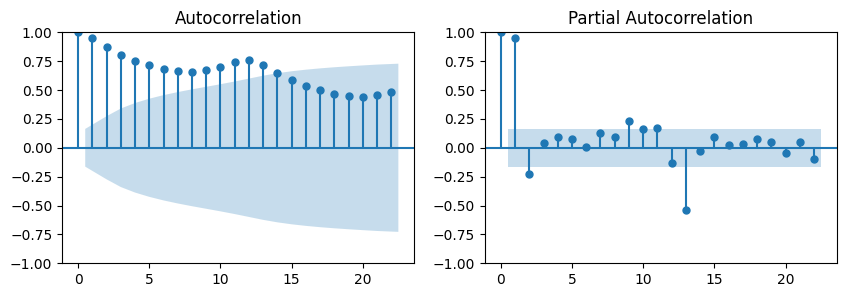

In [12]:
#ACF and PACF plots
from statsmodels.graphics.tsaplots import  plot_acf,plot_pacf

fig, ax= plt.subplots(1,2,figsize=(10,3))
plot_acf(data,ax=ax[0])
plot_pacf(data,ax=ax[1])
plt.show()

In [13]:
#Auto regressive (ar) model
model_ar = AutoReg(data,lags=2)
model_ar_fit= model_ar.fit()

#moving average(MA)model
model_ma=  ARIMA(data, order=(0,0,2))
model_ma_fit= model_ma.fit()
print("\nMA Model summary:\n",model_ma_fit.summary())

#AutoRegressive moving average(ARMA)Model
model_arma= ARIMA(data,order=(2,0,2))
model_arma_fit=model_arma.fit()
print("\nARMA Model Summary:\n",model_arma_fit.summary())

#AutoRegressive Integrated Movinng Average Model(ARIMA)
model_arima= ARIMA(data,order=(2,1,2))
model_arima_fit=model_arima.fit()
print("\nARIMA Model Summary:\n",model_arima_fit.summary())

#Seasonal AutoRegressive Integrated Moving Average(SARIMA)
model_sarima= SARIMAX(data,order=(2,1,2),seasonal_order=(1,1,1,12))
model_sarima_fit=model_sarima.fit()
print("\nSARIMA Model Summary:\n",model_sarima_fit.summary())


MA Model summary:
                                SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -757.063
Date:                Tue, 08 Apr 2025   AIC                           1522.126
Time:                        06:34:24   BIC                           1534.005
Sample:                    01-01-1949   HQIC                          1526.953
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.4095     14.386     19.491      0.000     252.213     308.606
ma.L1          1.3825     23.075      0.060      0.952     -43.844      46.609
ma.L2          1.0000     33.380

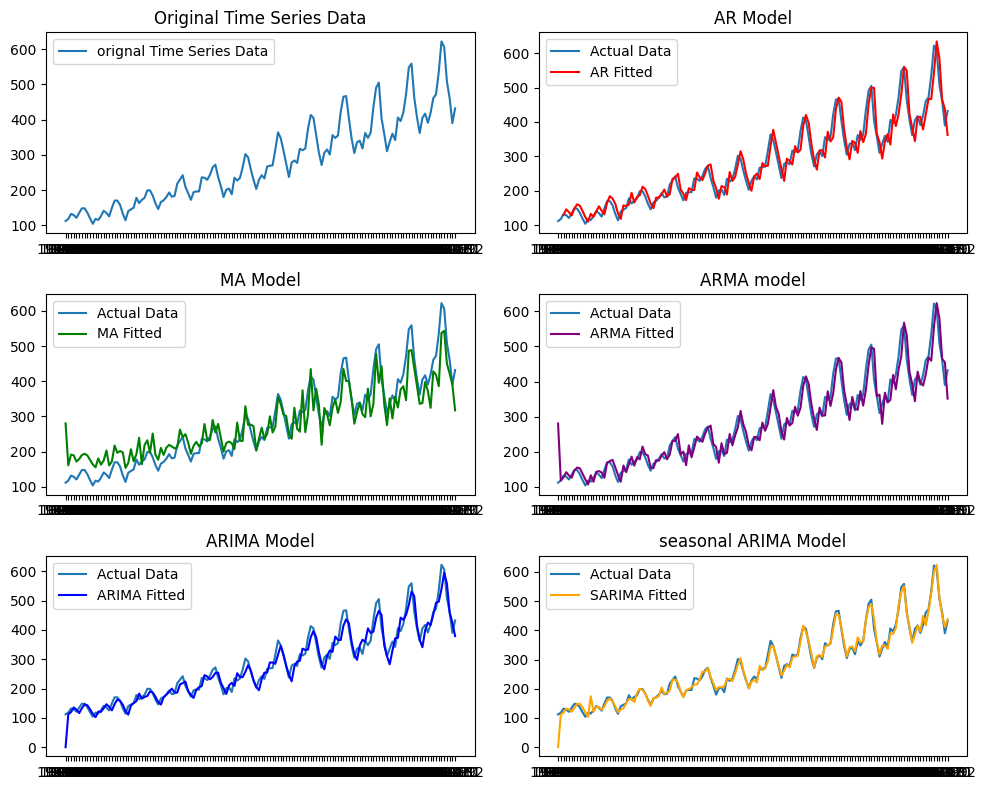

In [14]:
#plot of the original time series data
plt.figure(figsize=(10,8))

plt.subplot(3,2,1)
plt.plot(data,label="orignal Time Series Data")
plt.title("Original Time Series Data")
plt.legend()

#plot for AutoRegressive (AR) Model
plt.subplot(3,2,2)
plt.plot(data,label="Actual Data")
plt.plot(model_ar_fit.fittedvalues,label="AR Fitted",color='red')
plt.title("AR Model")
plt.legend()
#plot  for Moving  Average (MA)  Model
plt.subplot(3,2,3)
plt.plot(data,label="Actual Data")
plt.plot(model_ma_fit.fittedvalues,label="MA Fitted",color='green')
plt.title("MA Model")
plt.legend()
#plot for AutoRegressive Moving  Averge Model(ARMA)
plt.subplot(3,2,4)
plt.plot(data,label='Actual Data')
plt.plot(model_arma_fit.fittedvalues,label='ARMA Fitted',color='purple')
plt.title("ARMA model")
plt.legend()

#plot for AutoRegressive Integrated moving Average model
plt.subplot(3,2,5)
plt.plot(data,label="Actual Data")
plt.plot(model_arima_fit.fittedvalues,label="ARIMA Fitted",color='blue')
plt.title("ARIMA Model")
plt.legend()

#plot  for seasonal Autoregressive Integrated  Moving Average Model
plt.subplot(3,2,6)
plt.plot(data,label="Actual Data")
plt.plot(model_sarima_fit.fittedvalues,label="SARIMA Fitted",color='orange')
plt.title("seasonal ARIMA Model")
plt.legend()
plt.tight_layout(pad=1.08)
plt.show()


In [15]:
#calculate  the error
from sklearn.metrics import  mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE

#Calculate MAE and MAPE for  AutoRegressie (AR) Model
ar_mae=MAE(data[2:],model_ar_fit.fittedvalues)
ar_mape=MAPE(data[2:],model_ar_fit.fittedvalues)
print("AR Model:MAE =",ar_mae,",MAPE =",ar_mape*100)

#Calculate MAE and MAPE for Moving Average(MA ) Model
ma_mae=MAE(data,model_ma_fit.fittedvalues)
ma_mape=MAPE(data,model_ma_fit.fittedvalues)
print("MA Model : MAE=",ma_mae,",MAPE=",ma_mape*100)

#Calculate MAE  and MAPE for  AutoRegressive moving Average(ARMA)Model

AR Model:MAE = 24.695575487842053 ,MAPE = 8.908088192488682
MA Model : MAE= 38.29072366462272 ,MAPE= 16.65636264114559
